In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#decsribtion for continos columns only
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

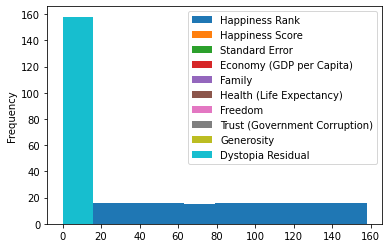

In [16]:
df.plot.hist()

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

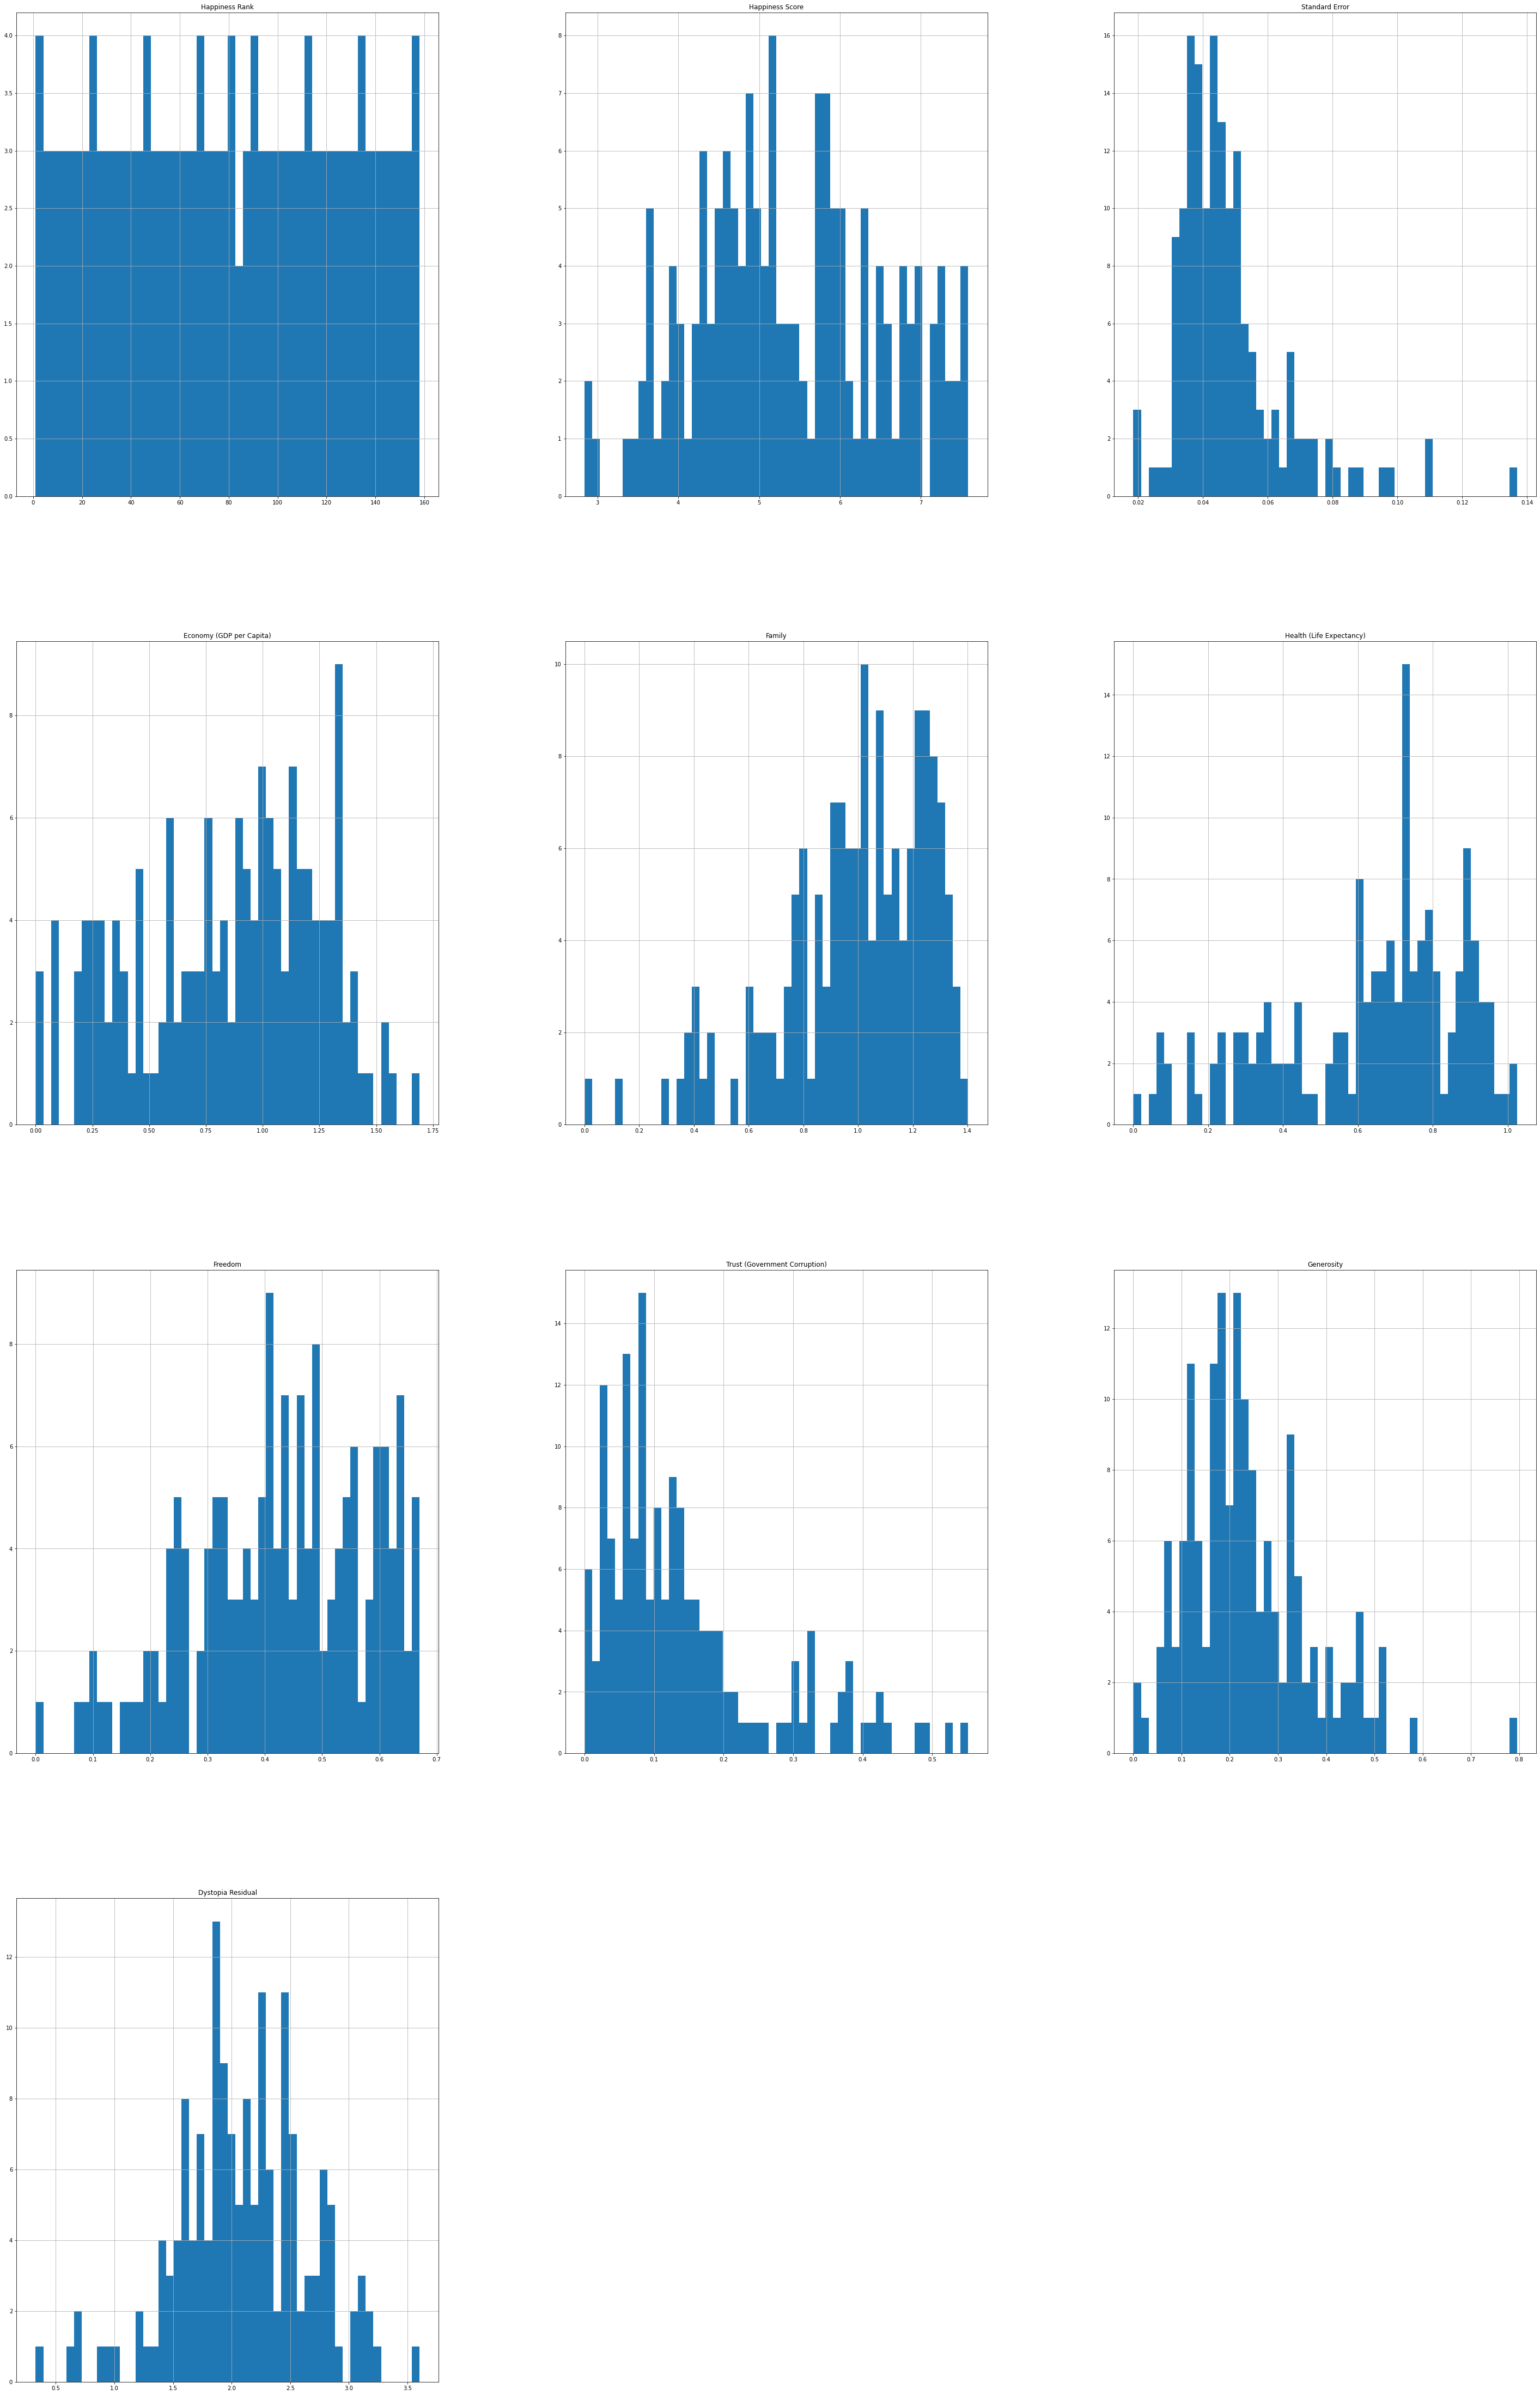

In [27]:
df.hist(figsize=(50,80),bins=50)

<AxesSubplot:>

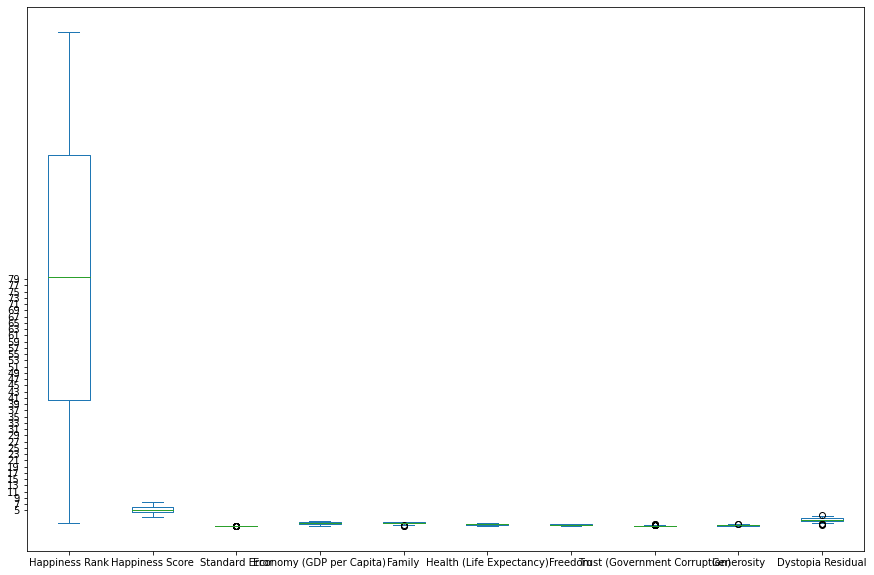

In [32]:
df.plot(kind='box',figsize=(15,10),yticks=range(5,80,2))

array([[<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Standard Error', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Rank'>],
       [<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (G

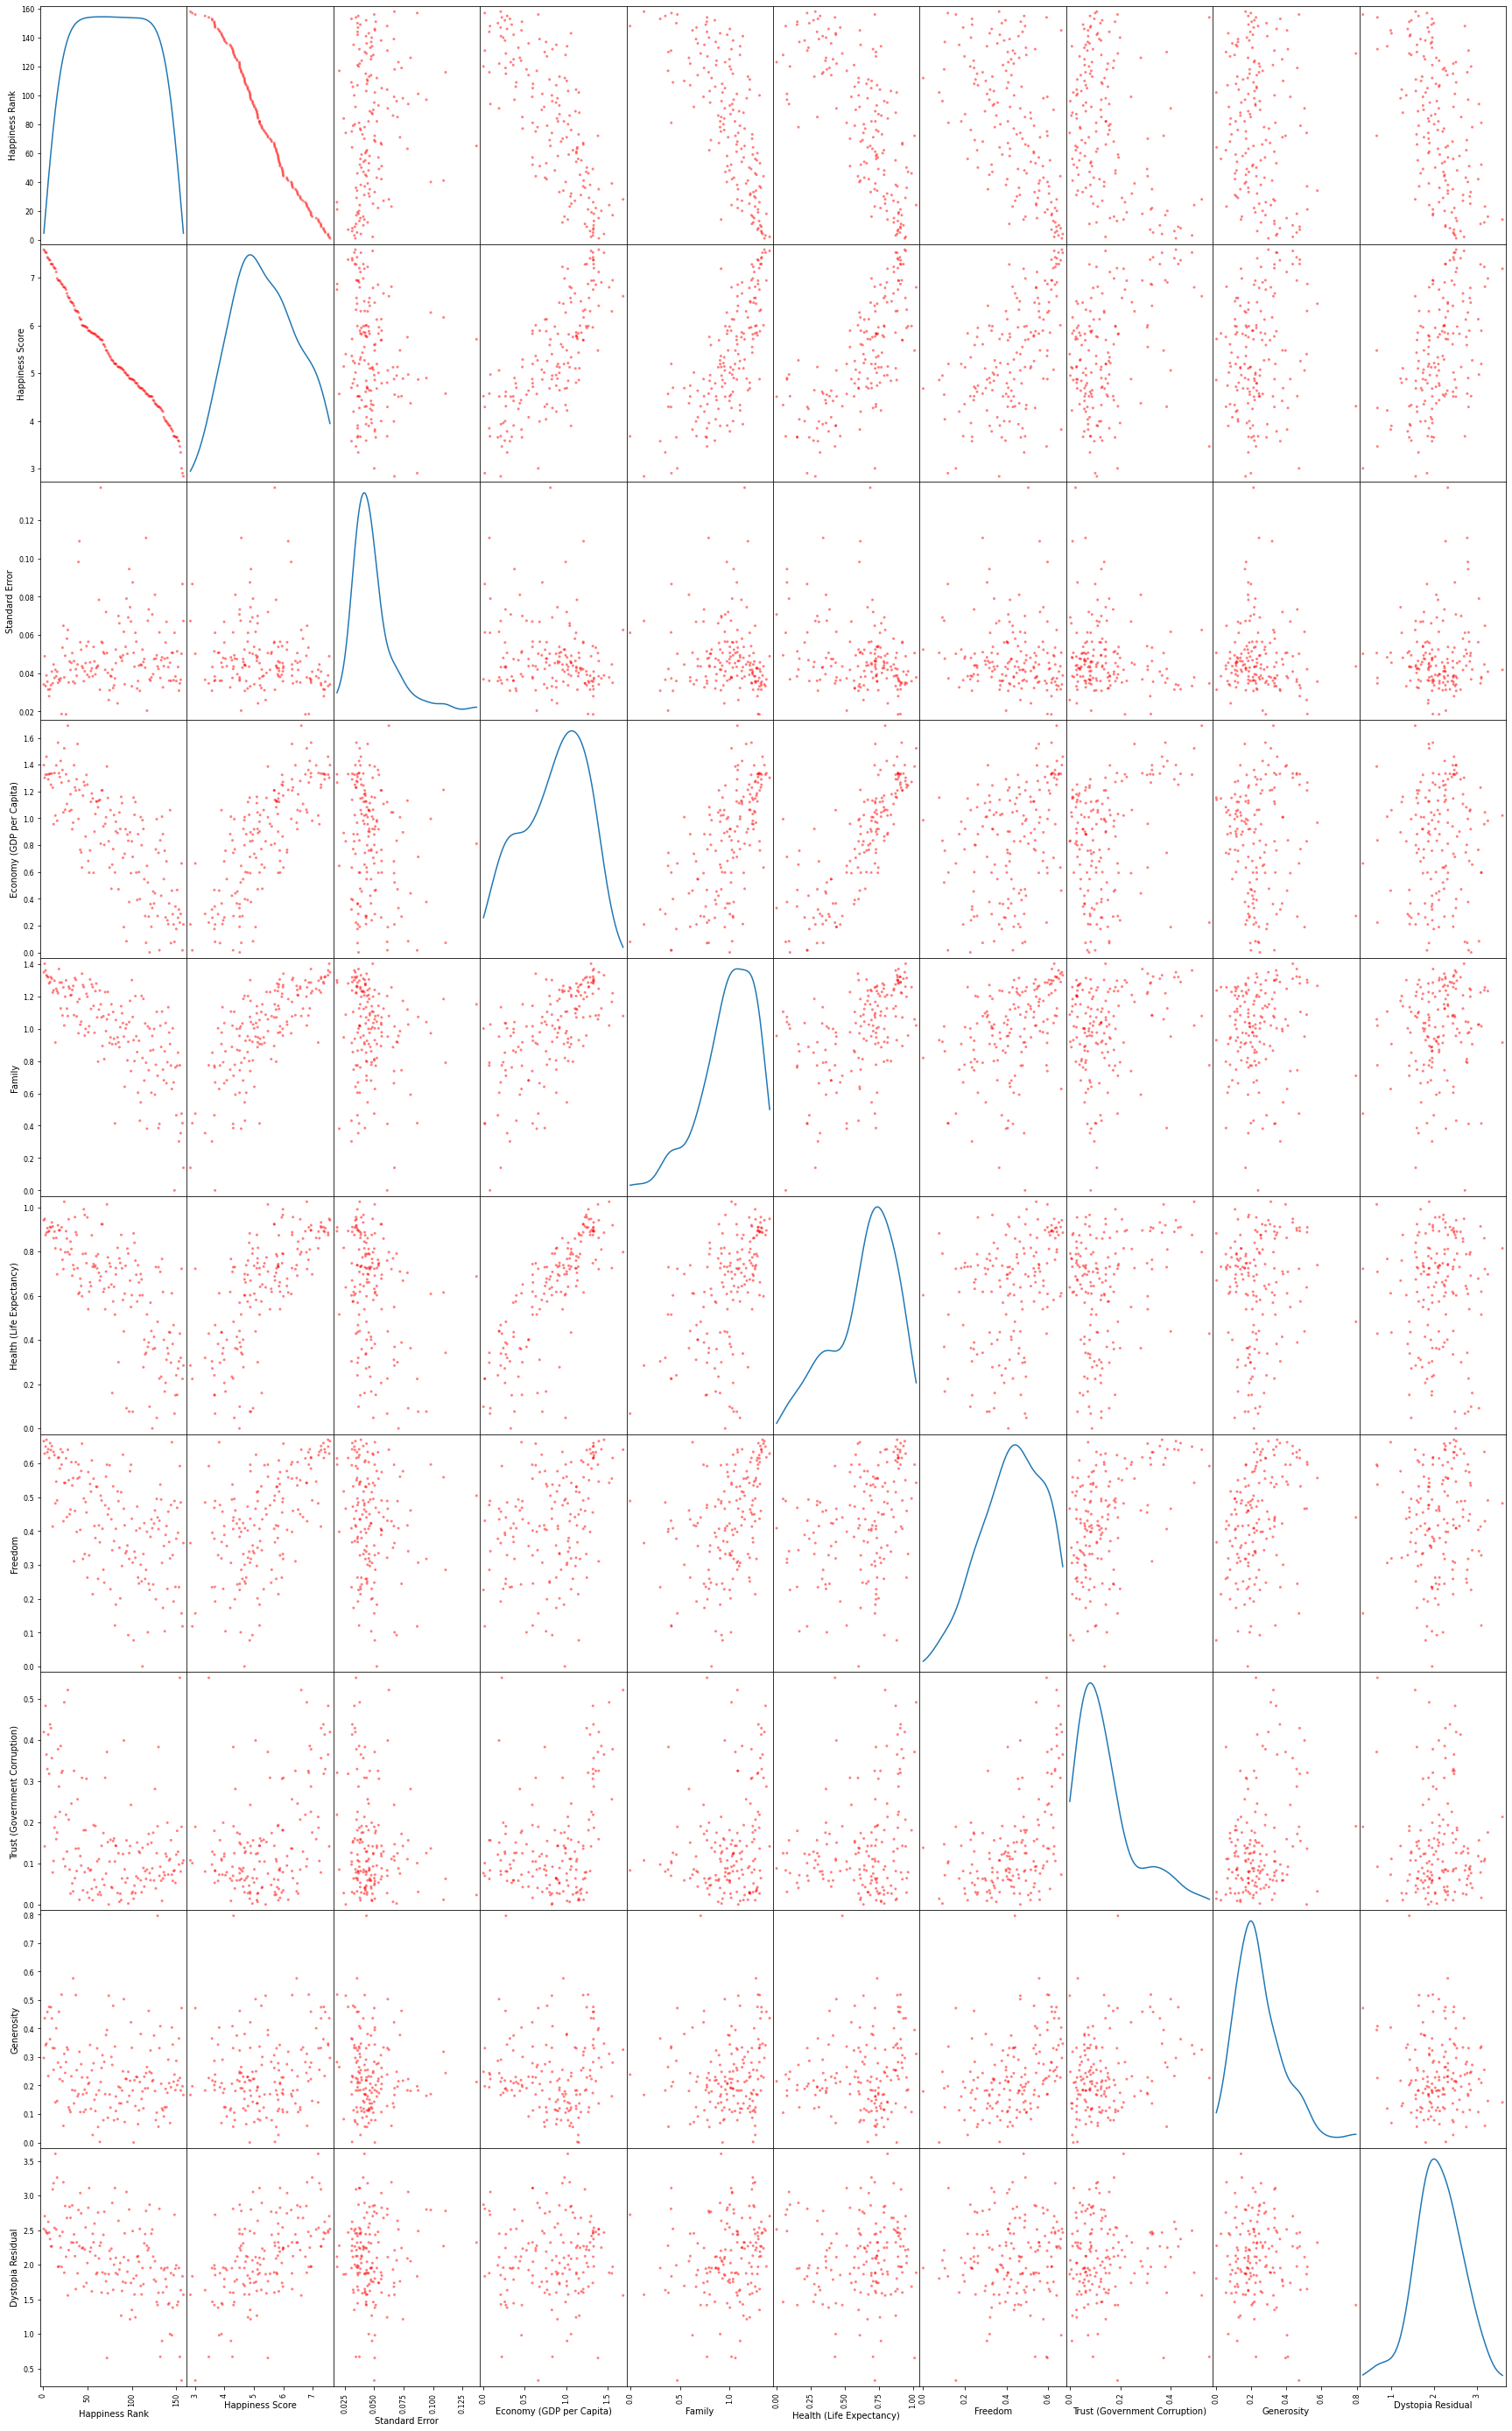

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(30,50),color='r',diagonal= 'kde')

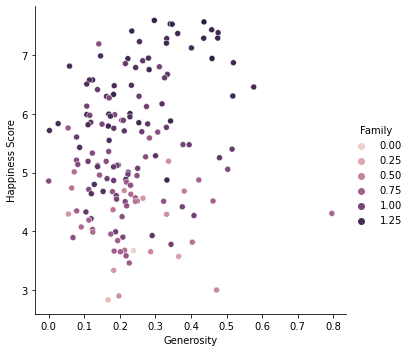

In [48]:
sns.relplot(x='Generosity',y ='Happiness Score',hue='Family', data=df)

In [52]:
#dropping the unwanted columns
X=df.drop(columns=['Family','Country','Region','Standard Error','Happiness Score'],axis=1)
Y=df['Happiness Score']

In [51]:
#import lib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [53]:
#spliting the data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [60]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

In [61]:
reg.fit(X_train, Y_train)

LinearRegression()

In [72]:
Y_train_pred= reg.predict(X_train)


In [74]:
Y_pred = reg.predict(X_test)

In [75]:
#evaluating the model..checking r2 score
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred, squared = False)

0.11964139125172867

In [76]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)


0.9895872629921302

In [ ]:
#high r2 score shows good reult fo the model